# Imports

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import xgboost as xg
from entsoe import EntsoePandasClient
from statsmodels.graphics import tsaplots

# Entsoe

## API setup

In [2]:
client = EntsoePandasClient(api_key = '5904b3c4-7835-4b64-a741-480681944340')

# period
start = pd.Timestamp('20180101', tz = 'Europe/Copenhagen')
end = pd.Timestamp('20221231', tz = 'Europe/Copenhagen')

# countries
country_code = 'DK_2' # Denmark (Copenhagen)
country_code_from = 'DE_LU' # Germany - Luxemburg
country_code_to = 'DK_2' # East Denmark

## Queries

In [4]:
# day-ahead prices
day_ahead_prices_series = client.query_day_ahead_prices(country_code, start = start, end = end)

In [5]:
day_ahead_prices = pd.DataFrame({'Day-ahead prices':day_ahead_prices_series})
day_ahead_prices # check that first and last day coincide with what specified, so that the query doesn't return only chunks

,Day-ahead prices
2018-01-01 00:00:00+01:00,26.33
2018-01-01 01:00:00+01:00,26.43
2018-01-01 02:00:00+01:00,26.10
2018-01-01 03:00:00+01:00,24.70
2018-01-01 04:00:00+01:00,24.74
...,...
2022-12-30 20:00:00+01:00,19.88
2022-12-30 21:00:00+01:00,1.45
2022-12-30 22:00:00+01:00,0.61
2022-12-30 23:00:00+01:00,0.01


In [10]:
# Actual load and load forecast
load_and_forecast = client.query_load_and_forecast(country_code, start = start, end = end)

In [52]:
load_and_forecast # check that first and last day coincide with what specified, so that the query doesn't return only chunks

,Forecasted Load,Actual Load
2018-01-01 00:00:00+01:00,3422.0,3421.0
2018-01-01 01:00:00+01:00,3289.0,3308.0
2018-01-01 02:00:00+01:00,3157.0,3118.0
2018-01-01 03:00:00+01:00,3025.0,3018.0
2018-01-01 04:00:00+01:00,2939.0,2916.0
...,...,...
2022-12-30 19:00:00+01:00,4344.0,4375.0
2022-12-30 20:00:00+01:00,4179.0,4187.0
2022-12-30 21:00:00+01:00,4053.0,4103.0
2022-12-30 22:00:00+01:00,3889.0,3965.0


In [14]:
# Solar and wind forecast generation
wind_solar_forecast = client.query_wind_and_solar_forecast(country_code, start = start, end = end, psr_type=None)

In [15]:
wind_solar_forecast # check that first and last day coincide with what specified, so that the query doesn't return only chunks

,Solar,Wind Offshore,Wind Onshore
2018-01-01 00:00:00+01:00,0.0,783.0,1493.0
2018-01-01 01:00:00+01:00,0.0,893.0,1481.0
2018-01-01 02:00:00+01:00,0.0,755.0,1430.0
2018-01-01 03:00:00+01:00,0.0,747.0,1458.0
2018-01-01 04:00:00+01:00,0.0,886.0,1472.0
...,...,...,...
2022-12-30 19:00:00+01:00,0.0,1445.0,2973.0
2022-12-30 20:00:00+01:00,0.0,1436.0,3033.0
2022-12-30 21:00:00+01:00,0.0,1406.0,3205.0
2022-12-30 22:00:00+01:00,0.0,1417.0,3272.0


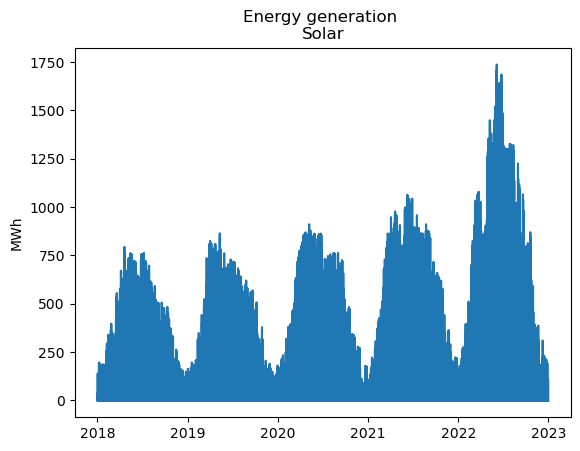

In [110]:
plt.plot(wind_solar_forecast['Solar'])
plt.title('Energy generation \nSolar')
plt.ylabel('MWh')
plt.show()

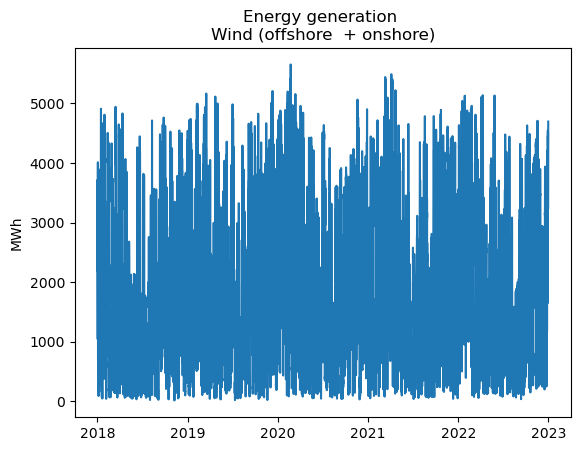

In [112]:
plt.plot(wind_solar_forecast['Wind Onshore']+wind_solar_forecast['Wind Offshore'])
plt.title('Energy generation \nWind (offshore  + onshore)')
plt.ylabel('MWh')
plt.show()

Imports

In [ ]:
imports =  client.query_import(country_code, start, end)

In [ ]:
imports.head()

Exports

In [ ]:
exports1 =  client.query_crossborder_flows(country_code, 'DE_LU', start = start, end = end)

In [ ]:
exports2 =  client.query_crossborder_flows(country_code, 'DK_1', start = start, end = end)

In [ ]:
exports3 =  client.query_crossborder_flows(country_code, 'SE_4', start = start, end = end)

In [ ]:
exportsDLA = client.query_crossborder_flows(country_code, 'DE_AT_LU', start = start, end = end)

## Saving the data

In [7]:
day_ahead_prices.to_csv('./data/day_ahead_prices.csv')

In [135]:
day_ahead_prices.to_csv('day_ahead_prices.csv')
load_and_forecast.to_csv('load_and_forecast.csv')
wind_solar_forecast.to_csv('wind_solar_forecast.csv')
exports1.to_csv('exportsDELU.csv')
exports2.to_csv('exportsDK1.csv')
exports3.to_csv('exportsSE4.csv')
exportsDLA.to_csv('exportsDELUAT.csv')